# 사전 작업
### 사용 데이터
- [환율 데이터 날마다 업데이트됨](https://www.kaggle.com/datasets/ruchi798/currency-exchange-rates)
- [미슐랭 데이터](https://www.kaggle.com/datasets/ngshiheng/michelin-guide-restaurants-2021)

### 크게 필터링 하는 작업과 환율적용하는 작업 했습니다.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/data/michelin_my_maps.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6502 entries, 0 to 6501
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6502 non-null   object 
 1   Address      6502 non-null   object 
 2   Location     6502 non-null   object 
 3   MinPrice     6501 non-null   object 
 4   MaxPrice     6501 non-null   object 
 5   Currency     6501 non-null   object 
 6   Cuisine      6502 non-null   object 
 7   Longitude    6502 non-null   float64
 8   Latitude     6502 non-null   float64
 9   PhoneNumber  6381 non-null   float64
 10  Url          6502 non-null   object 
 11  WebsiteUrl   5375 non-null   object 
 12  Award        6502 non-null   object 
dtypes: float64(3), object(10)
memory usage: 660.5+ KB


In [ ]:
df.head()
df=df.dropna() #이거 안해줘서 오류 1시간동안 찾음
pd.options.display.float_format = '{:,.2f}'.format #소수점 2자리까지만 출력

# 나라별 통계 어느 나라가 제일 많은지

In [ ]:
country = []
for i in df['Address']:
  country_name = i.split(', ')[-1]
  country.append(country_name)

df['Country'] = country
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,Country
0,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany",Wolfsburg,225,225,EUR,"Creative, Modern Cuisine",10.79,52.43,"495,361,606,056.00",https://guide.michelin.com/en/niedersachsen/wo...,http://www.restaurant-aqua.com,3 MICHELIN Stars,Germany
1,The Table Kevin Fehling,"Shanghaiallee 15, Hamburg, 20457, Germany",Hamburg,230,230,EUR,Creative,10.00,53.54,"494,022,867,422.00",https://guide.michelin.com/en/hamburg-region/h...,http://www.the-table-hamburg.de/,3 MICHELIN Stars,Germany
2,Restaurant Überfahrt Christian Jürgens,"Überfahrtstraße 10, Rottach-Egern, 83700, Germany",Rottach-Egern,259,319,EUR,Creative,11.76,47.70,"4,980,226,690.00",https://guide.michelin.com/en/bayern/rottach-e...,http://www.althoffcollection.com,3 MICHELIN Stars,Germany
3,Victor's Fine Dining by christian bau,"Schlossstraße 27, Perl, 66706, Germany",Perl,205,295,EUR,Creative,6.39,49.54,"49,686,679,118.00",https://guide.michelin.com/en/saarland/perl/re...,https://www.victors-fine-dining.de/,3 MICHELIN Stars,Germany
4,Rutz,"Chausseestraße 8, Berlin, 10115, Germany",Berlin,198,245,EUR,"Modern Cuisine, Creative",13.39,52.53,"493,024,628,760.00",https://guide.michelin.com/en/berlin-region/be...,https://www.rutz-restaurant.de/,3 MICHELIN Stars,Germany


In [ ]:
df['Country'] = df.Country.replace({'China Mainland': 'China', 'Taipei & Taichung':'Taiwan', 'Macau': 'Macao', 'Czech Republic':'Czechia'})
print(df.Country.unique())
len(df.Country.unique())

['Germany' 'United Kingdom' 'Austria' 'Macao' 'Hong Kong' 'Spain' 'Japan'
 'South Korea' 'Italy' 'China' 'United States' 'Sweden' 'Norway' 'Denmark'
 'Singapore' 'Taiwan' 'Netherlands' 'Switzerland' 'France' 'Belgium'
 'Ireland' 'Thailand' 'Portugal' 'Greece' 'Slovenia' 'Luxembourg' 'Brazil'
 'Malta' 'Andorra' 'San Marino' 'Czechia' 'Iceland' 'Finland' 'Croatia'
 'Hungary' 'Poland' 'Serbia']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


37

In [ ]:
country=df.groupby(df['Country'])
country=country.size().sort_values()
print(country)

Country
Serbia               1
San Marino           1
Iceland              1
Andorra              2
Poland               6
Czechia              7
Hungary              7
Greece               8
Malta                9
Finland              9
Slovenia            12
Norway              12
Macao               17
Luxembourg          20
Croatia             20
South Korea         25
Austria             29
Sweden              31
Ireland             37
Brazil              41
Denmark             41
Taiwan              50
Thailand            53
Portugal            56
China               63
Singapore           64
Hong Kong           82
Netherlands        225
Switzerland        251
Belgium            262
United Kingdom     271
Japan              402
Spain              440
United States      514
Italy              586
Germany            619
France            1065
dtype: int64


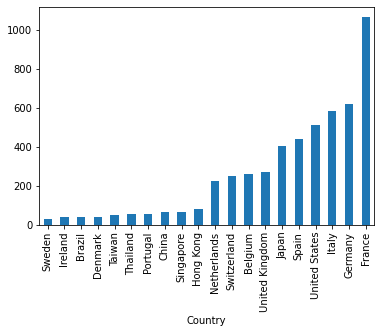

In [ ]:
country=country.iloc[-20:]
country.plot(kind='bar',x='Country')

# 어느 종류의 음식이 제일 많은지

In [ ]:
cuisine = {}
for i in df['Cuisine']:
  c = i.split(', ')
  for ii in c:
    if ii in cuisine.keys():
      cuisine[ii]+=1
    else:
      cuisine[ii]=1

cuisine=pd.DataFrame.from_dict(cuisine, orient='index').rename(columns={0:'갯수'})
cuisine=cuisine.sort_values(by=['갯수'])
print(cuisine)

                       갯수
Jokbal                  1
Thai and Vietnamese     1
Israeli                 1
Obanzai                 1
Zhejiang                1
...                   ...
Regional Cuisine      280
Contemporary          311
Traditional Cuisine   391
Creative              764
Modern Cuisine       1452

[214 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44079 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


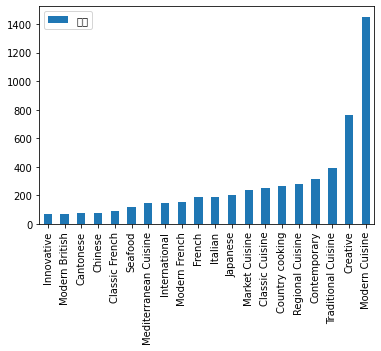

In [ ]:
# cuisine=cuisine.loc[cuisine['갯수']>100]
cuisine=cuisine.iloc[-20:]
cuisine.plot(kind='bar',y='갯수')

# 기존 가격 다 유로로 환산

In [ ]:
exchange=pd.read_csv('/content/drive/MyDrive/data/exchange_rates.csv')
exchange.head()
# 이거 유로 기준이네..

,Unnamed: 0,Country/Currency,currency,value,date
0,0,Australia Dollar,AUD,1.58,17/12/2021
1,1,Great Britain Pound,GBP,0.85,17/12/2021
2,2,Euro,EUR,1.00,17/12/2021
3,3,Japan Yen,JPY,128.30,17/12/2021
4,4,Switzerland Franc,CHF,1.04,17/12/2021


In [ ]:
exchange=exchange.loc[exchange['date']=='18/04/2022']
print(exchange)

       Unnamed: 0             Country/Currency currency     value        date
18598       18598             Australia Dollar      AUD      1.46  18/04/2022
18599       18599          Great Britain Pound      GBP      0.83  18/04/2022
18600       18600                         Euro      EUR      1.00  18/04/2022
18601       18601                    Japan Yen      JPY    136.73  18/04/2022
18602       18602            Switzerland Franc      CHF      1.02  18/04/2022
...           ...                          ...      ...       ...         ...
18743       18743  United Arab Emirates Dirham      AED      3.97  18/04/2022
18744       18744                 Vanuatu Vatu      VUV    121.58  18/04/2022
18745       18745                 Vietnam Dong      VND 24,730.57  18/04/2022
18746       18746                   Yemen Rial      YER    270.24  18/04/2022
18747       18747                Zambia Kwacha      ZMK  9,720.31  18/04/2022

[150 rows x 5 columns]


In [ ]:
minPricetoEUR = []
maxPricetoEUR = []

# 1시간동안 삽질하면서 찾은건데 중간에 currency와 가격이 비어있는 데이터가 있었음
# 이거 떄문에 오류나서 그냥 dopna로 해당 데이터 날림

for min,max,cur,name in zip(df['MinPrice'],df['MaxPrice'],df['Currency'],df['Name']):
  rate=exchange.loc[exchange['currency']==cur,['value']]
  rate=rate.iloc[0][0]
  min=int(min.replace(',',''))/rate
  max=int(max.replace(',',''))/rate
  minPricetoEUR.append(min)
  maxPricetoEUR.append(max)

df['minPricetoEUR'] = minPricetoEUR
df['maxPricetoEUR'] = maxPricetoEUR
df.head()

,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,Country,minPricetoEUR,maxPricetoEUR
0,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany",Wolfsburg,225,225,EUR,"Creative, Modern Cuisine",10.79,52.43,"495,361,606,056.00",https://guide.michelin.com/en/niedersachsen/wo...,http://www.restaurant-aqua.com,3 MICHELIN Stars,Germany,225.00,225.00
1,The Table Kevin Fehling,"Shanghaiallee 15, Hamburg, 20457, Germany",Hamburg,230,230,EUR,Creative,10.00,53.54,"494,022,867,422.00",https://guide.michelin.com/en/hamburg-region/h...,http://www.the-table-hamburg.de/,3 MICHELIN Stars,Germany,230.00,230.00
2,Restaurant Überfahrt Christian Jürgens,"Überfahrtstraße 10, Rottach-Egern, 83700, Germany",Rottach-Egern,259,319,EUR,Creative,11.76,47.70,"4,980,226,690.00",https://guide.michelin.com/en/bayern/rottach-e...,http://www.althoffcollection.com,3 MICHELIN Stars,Germany,259.00,319.00
3,Victor's Fine Dining by christian bau,"Schlossstraße 27, Perl, 66706, Germany",Perl,205,295,EUR,Creative,6.39,49.54,"49,686,679,118.00",https://guide.michelin.com/en/saarland/perl/re...,https://www.victors-fine-dining.de/,3 MICHELIN Stars,Germany,205.00,295.00
4,Rutz,"Chausseestraße 8, Berlin, 10115, Germany",Berlin,198,245,EUR,"Modern Cuisine, Creative",13.39,52.53,"493,024,628,760.00",https://guide.michelin.com/en/berlin-region/be...,https://www.rutz-restaurant.de/,3 MICHELIN Stars,Germany,198.00,245.00


# 가장 비싼 식당이 많은 나라, 원화로 환산

In [ ]:
expansive=df[['Country','maxPricetoEUR']].groupby('Country').mean().sort_values(by='maxPricetoEUR')
print(expansive)
# 유로로 환산되었을 때

                maxPricetoEUR
Country                      
Serbia                  17.89
Poland                  47.29
Brazil                  51.22
Czechia                 59.84
Taiwan                  79.26
Malta                   84.00
Ireland                 84.43
Thailand                86.13
Croatia                 86.15
Hungary                 87.98
Spain                   89.09
Slovenia                92.25
United States           93.48
Greece                  95.00
San Marino             100.00
Netherlands            103.91
Belgium                104.35
Portugal               106.05
Italy                  108.05
Andorra                108.50
United Kingdom         109.28
Germany                112.79
Iceland                113.24
France                 113.93
Luxembourg             114.10
Finland                117.89
South Korea            124.05
Sweden                 127.01
Austria                129.31
Japan                  142.41
Switzerland            146.93
Singapore 

In [ ]:
r=int(exchange.loc[exchange['currency']=="KRW",['value']].iloc[0,0]) #원화로 바꾸기 위한 환율

maxPricetoKRW = []

for i in expansive['maxPricetoEUR']:
  maxPricetoKRW.append(i*r)

expansive['maxPricetoKRW'] = maxPricetoKRW
print(expansive)
# 한국의 가장 비싼 메뉴들은 대충 16만원정도 함니다..

                maxPricetoEUR  maxPricetoKRW
Country                                     
Serbia                  17.89      23,807.14
Poland                  47.29      62,948.12
Brazil                  51.22      68,171.31
Czechia                 59.84      79,647.63
Taiwan                  79.26     105,501.41
Malta                   84.00     111,804.00
Ireland                 84.43     112,379.57
Thailand                86.13     114,645.15
Croatia                 86.15     114,672.27
Hungary                 87.98     117,099.44
Spain                   89.09     118,580.00
Slovenia                92.25     122,784.75
United States           93.48     124,416.17
Greece                  95.00     126,445.00
San Marino             100.00     133,100.00
Netherlands            103.91     138,305.69
Belgium                104.35     138,891.37
Portugal               106.05     141,157.30
Italy                  108.05     143,820.68
Andorra                108.50     144,413.50
United Kin

# 가장 싼 식당이 많은 나라, 원화로 환산

In [ ]:
cheap=df[['Country','minPricetoEUR']].groupby('Country').mean().sort_values(by='minPricetoEUR')
print(cheap)
# 유로로 환산되었을 때

                minPricetoEUR
Country                      
Serbia                  17.89
Brazil                  29.80
Czechia                 31.15
Poland                  38.70
San Marino              42.00
Hungary                 48.60
Luxembourg              49.60
Taiwan                  49.72
Belgium                 50.90
Thailand                51.41
Netherlands             53.62
Croatia                 58.17
Malta                   58.56
France                  58.66
South Korea             59.50
Slovenia                62.08
Spain                   64.47
Ireland                 65.78
Greece                  72.12
Italy                   73.02
Japan                   73.55
Germany                 74.60
Portugal                76.52
United States           76.56
United Kingdom          77.05
Austria                 84.66
Switzerland             85.23
Singapore               87.10
Hong Kong               89.90
China                   90.75
Andorra                 91.00
Finland   

In [ ]:
r=int(exchange.loc[exchange['currency']=="KRW",['value']].iloc[0,0]) #원화로 바꾸기 위한 환율

minPricetoKRW = []

for i in cheap['minPricetoEUR']:
  minPricetoKRW.append(i*r)

cheap['minPricetoKRW'] = minPricetoKRW 
print(cheap)
#한국은 제일 싼 메뉴가 7만원정도 하네요..

                minPricetoEUR  minPricetoKRW
Country                                     
Serbia                  17.89      23,807.14
Brazil                  29.80      39,663.77
Czechia                 31.15      41,460.30
Poland                  38.70      51,516.05
San Marino              42.00      55,902.00
Hungary                 48.60      64,687.59
Luxembourg              49.60      66,017.60
Taiwan                  49.72      66,181.69
Belgium                 50.90      67,754.00
Thailand                51.41      68,427.94
Netherlands             53.62      71,365.26
Croatia                 58.17      77,424.97
Malta                   58.56      77,937.44
France                  58.66      78,081.58
South Korea             59.50      79,193.08
Slovenia                62.08      82,632.92
Spain                   64.47      85,807.15
Ireland                 65.78      87,558.22
Greece                  72.12      95,998.38
Italy                   73.02      97,185.71
Japan     

# 어디에 3성이 제일 많은지

In [ ]:
star=df.groupby(['Country','Award']).size()
print(star)

Country         Award           
Andorra         1 MICHELIN Star       1
                Bib Gourmand          1
Austria         1 MICHELIN Star      10
                2 MICHELIN Stars      6
                3 MICHELIN Stars      1
                                   ... 
United Kingdom  Bib Gourmand         98
United States   1 MICHELIN Star     141
                2 MICHELIN Stars     34
                3 MICHELIN Stars     13
                Bib Gourmand        326
Length: 117, dtype: int64


In [ ]:
ac=df.groupby(['Award','Country']).size().to_frame(name='갯수')
ac=ac.reset_index()
ms1=ac[ac['Award']=='1 MICHELIN Star'].sort_values(by='갯수')
print(ms1)

              Award         Country   갯수
0   1 MICHELIN Star         Andorra    1
25  1 MICHELIN Star      San Marino    1
23  1 MICHELIN Star          Poland    1
14  1 MICHELIN Star         Iceland    1
6   1 MICHELIN Star         Czechia    2
27  1 MICHELIN Star        Slovenia    5
20  1 MICHELIN Star           Malta    5
11  1 MICHELIN Star          Greece    5
8   1 MICHELIN Star         Finland    7
19  1 MICHELIN Star           Macao    7
13  1 MICHELIN Star         Hungary    7
22  1 MICHELIN Star          Norway    8
18  1 MICHELIN Star      Luxembourg    8
3   1 MICHELIN Star          Brazil    8
28  1 MICHELIN Star     South Korea    9
5   1 MICHELIN Star         Croatia   10
1   1 MICHELIN Star         Austria   10
15  1 MICHELIN Star         Ireland   14
30  1 MICHELIN Star          Sweden   14
32  1 MICHELIN Star          Taiwan   14
7   1 MICHELIN Star         Denmark   18
33  1 MICHELIN Star        Thailand   23
24  1 MICHELIN Star        Portugal   26
26  1 MICHELIN S

In [ ]:
ms2=ac[ac['Award']=='2 MICHELIN Stars'].sort_values(by='갯수')
print(ms2)

               Award         Country  갯수
54  2 MICHELIN Stars        Slovenia   1
43  2 MICHELIN Stars          Greece   1
51  2 MICHELIN Stars          Norway   1
48  2 MICHELIN Stars      Luxembourg   1
38  2 MICHELIN Stars          Brazil   4
57  2 MICHELIN Stars          Sweden   4
45  2 MICHELIN Stars         Ireland   4
49  2 MICHELIN Stars           Macao   5
55  2 MICHELIN Stars     South Korea   5
53  2 MICHELIN Stars       Singapore   5
60  2 MICHELIN Stars        Thailand   6
59  2 MICHELIN Stars          Taiwan   6
36  2 MICHELIN Stars         Austria   6
52  2 MICHELIN Stars        Portugal   7
40  2 MICHELIN Stars         Denmark   7
39  2 MICHELIN Stars           China   9
44  2 MICHELIN Stars       Hong Kong  12
50  2 MICHELIN Stars     Netherlands  17
61  2 MICHELIN Stars  United Kingdom  18
58  2 MICHELIN Stars     Switzerland  23
37  2 MICHELIN Stars         Belgium  23
56  2 MICHELIN Stars           Spain  33
62  2 MICHELIN Stars   United States  34
46  2 MICHELIN S

In [ ]:
ms3=ac[ac['Award']=='3 MICHELIN Stars'].sort_values(by='갯수')
print(ms3)

               Award         Country  갯수
63  3 MICHELIN Stars         Austria   1
65  3 MICHELIN Stars           China   1
80  3 MICHELIN Stars          Taiwan   1
78  3 MICHELIN Stars          Sweden   1
74  3 MICHELIN Stars          Norway   1
64  3 MICHELIN Stars         Belgium   2
66  3 MICHELIN Stars         Denmark   2
76  3 MICHELIN Stars     South Korea   2
73  3 MICHELIN Stars     Netherlands   2
79  3 MICHELIN Stars     Switzerland   3
75  3 MICHELIN Stars       Singapore   3
72  3 MICHELIN Stars           Macao   3
69  3 MICHELIN Stars       Hong Kong   7
81  3 MICHELIN Stars  United Kingdom   8
68  3 MICHELIN Stars         Germany   9
70  3 MICHELIN Stars           Italy  11
77  3 MICHELIN Stars           Spain  11
82  3 MICHELIN Stars   United States  13
71  3 MICHELIN Stars           Japan  17
67  3 MICHELIN Stars          France  29


In [ ]:
bg=ac[ac['Award']=='Bib Gourmand'].sort_values(by='갯수')
print(bg)

            Award         Country   갯수
83   Bib Gourmand         Andorra    1
106  Bib Gourmand          Serbia    1
91   Bib Gourmand         Finland    2
103  Bib Gourmand          Norway    2
94   Bib Gourmand          Greece    2
100  Bib Gourmand           Macao    2
101  Bib Gourmand           Malta    4
87   Bib Gourmand           China    5
89   Bib Gourmand         Czechia    5
104  Bib Gourmand          Poland    5
108  Bib Gourmand        Slovenia    6
109  Bib Gourmand     South Korea    9
88   Bib Gourmand         Croatia   10
99   Bib Gourmand      Luxembourg   11
84   Bib Gourmand         Austria   12
111  Bib Gourmand          Sweden   12
90   Bib Gourmand         Denmark   14
107  Bib Gourmand       Singapore   16
95   Bib Gourmand       Hong Kong   19
96   Bib Gourmand         Ireland   19
105  Bib Gourmand        Portugal   23
114  Bib Gourmand        Thailand   24
86   Bib Gourmand          Brazil   29
113  Bib Gourmand          Taiwan   29
115  Bib Gourmand  United